Importing Libraries

In [1]:
#Utility Libraries
import numpy as np
import pandas as pd

In [3]:
#Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Data Procrssing Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#Algorithm Libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
#Math library
import math

Importing Dataset

In [8]:
df = pd.read_csv("C:\\Users\\Sakshi Rathore\\Downloads\\BostonHousing.csv")

In [ ]:
#  CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
df.shape

(506, 14)

In [12]:
# Calculating the mean, minimum, deviation, maximum and other factors
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data Visualisation

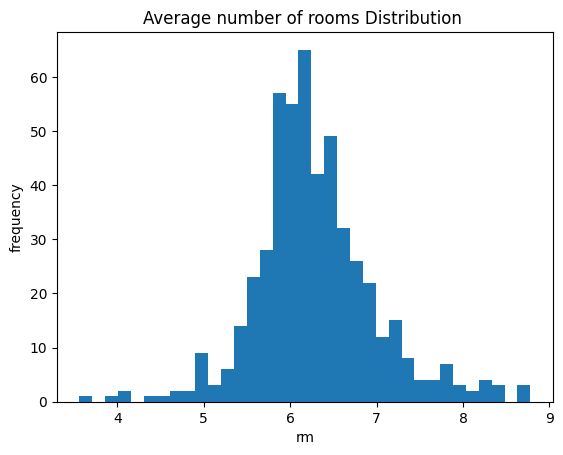

In [15]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['rm'], bins = 35)
plt.title("Average number of rooms Distribution ")
plt.xlabel("rm")
plt.ylabel("frequency")
plt.show()

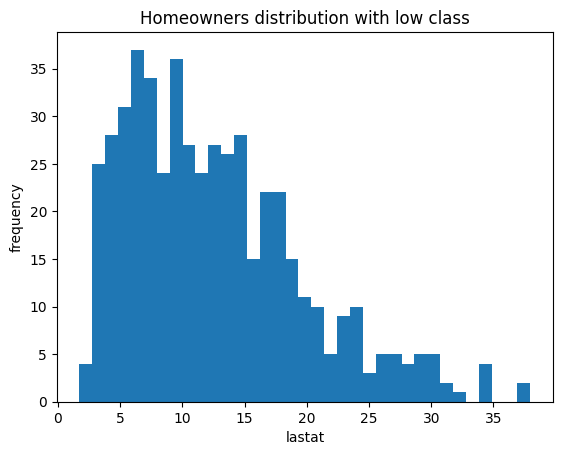

In [16]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['lstat'], bins = 35)
plt.title("Homeowners distribution with low class")
plt.xlabel("lastat")
plt.ylabel("frequency")
plt.show()

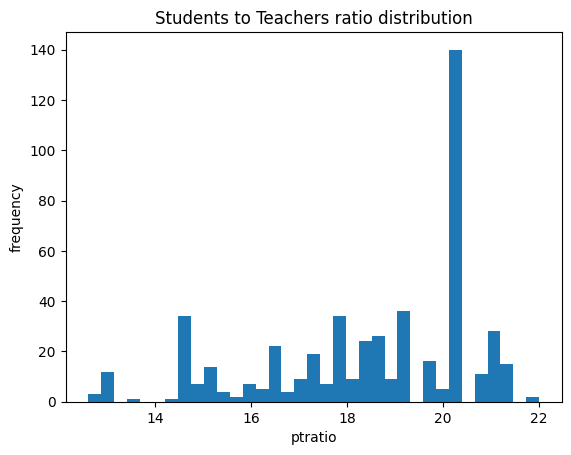

In [17]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['ptratio'], bins = 35)
plt.title("Students to Teachers ratio distribution")
plt.xlabel("ptratio")
plt.ylabel("frequency")
plt.show()

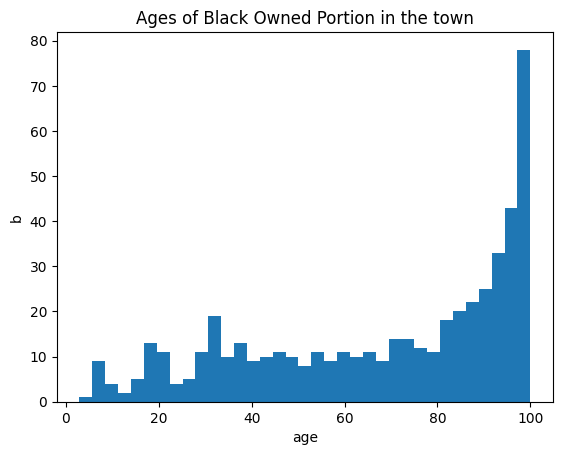

In [24]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['age'], bins = 35)
plt.title("Ages of Black Owned Portion in the town")
plt.xlabel("age")
plt.ylabel("b")
plt.show()

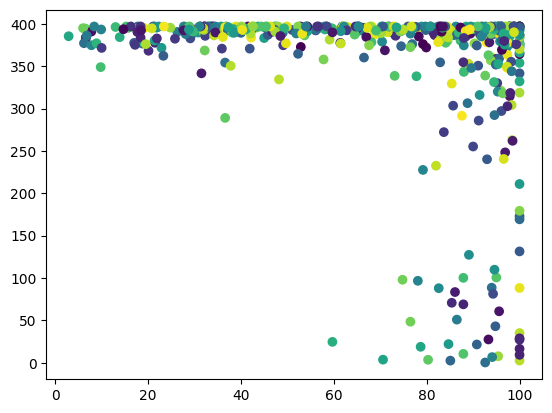

In [21]:
N = 506
x = df.age
y = df.b
colors = np.random.rand(N)

plt.scatter(x, y, c=colors)
plt.show()

Data Cleaning

In [27]:
df = df.fillna(df.mean())
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [28]:
df.rename(columns={'medv':'PRICE'}, inplace = True)

Feature Engineering

In [30]:
corr = df.corr()
corr.shape

(14, 14)

In [31]:
df.shape

(506, 14)

In [32]:
 #independent columns
X = df.iloc[:,0:13]
#target column i.e price range
y = df.iloc[:,-1] #target column i.e price range
    
y = np.round(df['PRICE'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['SPECS','SCORE'] #naming the dataframe columns
featureScores

,SPECS,SCORE
0,crim,5503.817133
1,zn,5937.859414
2,indus,873.746270
3,chas,59.080170
4,nox,5.073299
5,rm,21.981504
6,age,2424.308937
7,dis,163.919426
8,rad,1445.257647
9,tax,14817.836927


In [33]:
#print 5 best features
print(featureScores.nlargest(8,'SCORE'))

    SPECS         SCORE
9     tax  14817.836927
1      zn   5937.859414
0    crim   5503.817133
11      b   3340.486412
6     age   2424.308937
8     rad   1445.257647
12  lstat   1430.549632
2   indus    873.746270


Train the model

In [35]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)
    
# a benchmark regressor that takes mean of training sample as predicted value
class BenchmarkRegressor:
    def __init__(self):
        pass

    def fit(self, X, y, **kwargs):
        self.mean = y.mean()

    def predict(self, X):
        return [self.mean] * len(X)

    def get_params(self, deep=False):
        return {}

bm_regr = BenchmarkRegressor()
lr_regr = LinearRegression()
dt_regr = DecisionTreeRegressor()
rf_regr = RandomForestRegressor()

In [37]:
# create a list of models and evaluate each model 
models = [
        ('Benchmark', bm_regr),
        ('LR', lr_regr),
        ('Decision Tree', dt_regr),
        ('Random Forest', rf_regr)
    ]

Model Evaluation

In [38]:
print("Root Mean Square Error (RMSE) score\n")
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    sqrt_cv_results = [math.sqrt(abs(i)) for i in cv_results]
    print("{}: {} ({})".format(name, np.mean(sqrt_cv_results), np.std(sqrt_cv_results)))
    print('Result from each iteration of cross validation:', cv_results, '\n')  


Root Mean Square Error (RMSE) score

Benchmark: 9.177950478836506 (0.7737807285664642)
Result from each iteration of cross validation: [-74.2101503  -94.2805387  -95.37582544 -57.21621964 -95.40563134
 -90.4980737  -67.56159152 -98.78589027 -78.890478   -96.11071717] 

LR: 4.9157865021649005 (1.100070066715683)
Result from each iteration of cross validation: [-16.23985264 -32.08418468 -50.34337868 -11.05045461 -37.92995623
 -23.53699909 -13.9280335  -28.188571   -21.02834492 -19.42133552] 

Decision Tree: 3.984020890874959 (0.7374663455638765)
Result from each iteration of cross validation: [-11.06976744 -10.95348837 -20.02325581 -14.93023256 -11.44186047
 -10.74418605 -15.86046512 -27.13953488 -13.48837209 -28.51162791] 

Random Forest: 3.515301016709725 (1.326424436285531)
Result from each iteration of cross validation: [ -7.46407209  -7.90134419 -47.14064651  -6.89705814 -18.11062093
  -5.74136047  -6.27682558 -21.71708372  -8.78417907 -11.13423953] 



In [39]:
print("R-squared Value\n")
scoring = 'r2'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))
    print('Result from each iteration of cross validation:', cv_results, '\n')   


R-squared Value

Benchmark: -0.018033554802326445 (0.027024981426188983)
Result from each iteration of cross validation: [-8.64853105e-04 -8.96793062e-02 -3.46865208e-02 -7.46865034e-06
 -4.70799706e-04 -2.44987642e-03 -2.94473969e-02 -1.17907866e-03
 -7.16869921e-04 -2.08333777e-02] 

LR: 0.7041455915207928 (0.10597561527976235)
Result from each iteration of cross validation: [0.78097474 0.62917615 0.45384886 0.80686356 0.60224765 0.73927996
 0.7877762  0.71431338 0.7332578  0.79371762] 

Decision Tree: 0.789060501847788 (0.07025901623942792)
Result from each iteration of cross validation: [0.83847085 0.87232619 0.78933688 0.70044049 0.87318656 0.85136171
 0.75974882 0.72470949 0.81621662 0.66480739] 

Random Forest: 0.8447223036783502 (0.09954898396543017)
Result from each iteration of cross validation: [0.89527611 0.89347209 0.57619693 0.88127676 0.79401622 0.94210474
 0.88997098 0.79678062 0.9030812  0.87504738] 



Model Testing

In [43]:
model1 = lr_regr
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)

RMSE score: 4.306777216776923
R2 score: 0.7813711062730104


<Axes: xlabel='PRICE'>

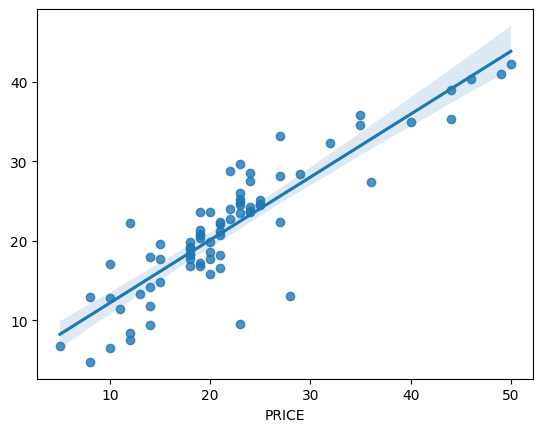

In [45]:
sns.regplot(x=y_test, y=y_pred)

In [47]:
print("Training Accuracy:",model1.score(X_train,y_train)*100)
print("Testing Accuracy:",model1.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model1.predict(X))*100)

Training Accuracy: 73.10756479346622
Testing Accuracy: 78.13711062730104
Model Accuracy: 73.88325201045105


In [49]:
model2 = dt_regr
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)

RMSE score: 4.777964772622445
R2 score: 0.7309155320468868


<Axes: xlabel='PRICE'>

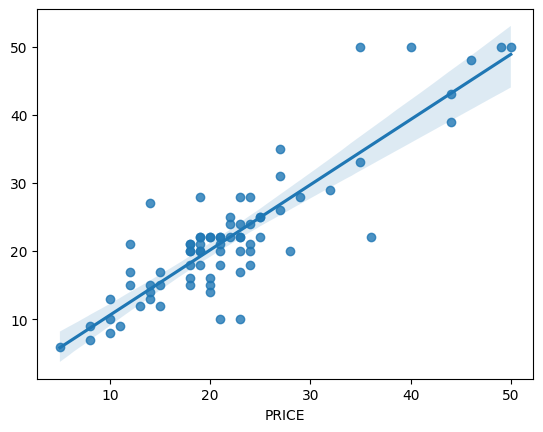

In [52]:
sns.regplot(x=y_test, y=y_pred)

In [54]:
print("Training Accuracy:",model3.score(X_train,y_train)*100)
print("Testing Accuracy:",model3.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model3.predict(X))*100)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.